## Data Exploration of the SDO ML v2 Dataset


In [1]:
from sdo.sood.data.sdo_ml_v2_dataset import SDOMLv2NumpyDataset, get_default_transforms

/home/marius/sdo-cli/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch.utils.data import DataLoader

storage_root = "/mnt/nas05/astrodata01/astroml_data/sdomlv2_full/sdomlv2.zarr"
storage_driver = "fs"
year = None
channel="171A"
cache_max_size =  2*1024*1024*2014
target_size=512
transforms = None #get_default_transforms(target_size=target_size, channel=channel)
freq = "1d"

In [3]:
from dateutil import parser

# https://docs.dask.org/en/stable/array-slicing.html
dataset = SDOMLv2NumpyDataset(
                storage_root=storage_root,
                storage_driver=storage_driver,
                cache_max_size=cache_max_size,
                year=year,
                channel=channel,
                transforms=transforms,
                start=parser.parse("2010-06-30 23:59"),
                end=parser.parse("2020-12-31 23:59"),
                freq=freq,
                irradiance=None,
                irradiance_channel=None,
                goes_cache_dir=None,
                n_items=None,
)

/data1/home/marius/sdo-cli/src/sdo/sood/data/sdo_ml_v2_dataset.py:246: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  images = images[time_index, :, :]
/data1/home/marius/sdo-cli/src/sdo/sood/data/sdo_ml_v2_dataset.py:246: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  images = images[time_index, :, :]
/data1/home/marius/sdo

In [4]:
loader = DataLoader(dataset, batch_size=16,
                          shuffle=False,
                          num_workers=4,
                          prefetch_factor=2)

In [5]:
len(dataset)

39101

In [6]:
import numpy as np
import pandas as pd
               
stats = []

for batch_idx, samples in enumerate(loader):
    print(f"checking batch {batch_idx}")
    X, attrs = samples
    for i, x in enumerate(X):
        obs_time = attrs["T_OBS"][i]        
        stats.append((obs_time, x.min().numpy(), x.max().numpy(), x.mean().numpy(), x.std().numpy(), x.median().numpy()))

checking batch 0
checking batch 1
checking batch 2
checking batch 3
checking batch 4
checking batch 5
checking batch 6
checking batch 7
checking batch 8
checking batch 9
checking batch 10
checking batch 11
checking batch 12
checking batch 13
checking batch 14
checking batch 15
checking batch 16
checking batch 17
checking batch 18
checking batch 19
checking batch 20
checking batch 21
checking batch 22
checking batch 23
checking batch 24
checking batch 25
checking batch 26
checking batch 27
checking batch 28
checking batch 29
checking batch 30
checking batch 31
checking batch 32
checking batch 33
checking batch 34
checking batch 35
checking batch 36
checking batch 37
checking batch 38
checking batch 39
checking batch 40
checking batch 41
checking batch 42
checking batch 43
checking batch 44
checking batch 45
checking batch 46
checking batch 47
checking batch 48
checking batch 49
checking batch 50
checking batch 51
checking batch 52
checking batch 53
checking batch 54
checking batch 55
ch

In [7]:
stats_df = pd.DataFrame(stats, columns=['timestamp', 'min_pixel', 'max_pixel', 'mean_pixel', 'std_pixel', "median_pixel"])
stats_df[['min_pixel', 'max_pixel', 'mean_pixel', 'std_pixel', "median_pixel"]] = stats_df[['min_pixel', 'max_pixel', 'mean_pixel', 'std_pixel', "median_pixel"]].astype(float, errors="raise")


stats_df["timestamp"] =  pd.to_datetime(stats_df["timestamp"], utc=True)
stats_df = stats_df.set_index('timestamp', drop=True)


In [8]:
stats_df.head()

,min_pixel,max_pixel,mean_pixel,std_pixel,median_pixel
timestamp,,,,,
2010-07-01 00:00:00.580000+00:00,0.0,1742.293945,106.697563,114.928635,86.232956
2010-07-02 00:00:00.570000+00:00,0.0,2539.478271,107.392647,118.202087,87.592163
2010-07-02 23:54:00.570000+00:00,0.0,2047.888916,107.875473,118.042435,88.040504
2010-07-04 00:00:00.580000+00:00,0.0,2335.114990,108.216385,111.166733,92.744865
2010-07-05 00:00:00.570000+00:00,0.0,1970.041016,108.046623,107.879211,93.548233


In [9]:
stats_df.describe()

,min_pixel,max_pixel,mean_pixel,std_pixel,median_pixel
count,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000
mean,0.000065,2967.380298,118.478216,149.973573,89.578384
std,0.005035,1226.838425,13.962221,34.988873,10.158794
min,0.000000,675.543030,90.483315,95.456238,64.890800
25%,0.000000,2073.155518,108.894753,115.228340,84.242050
50%,0.000000,3088.365723,114.073067,164.136307,88.914543
75%,0.000000,3967.856689,130.591965,181.872665,92.412727
max,0.645533,51979.496094,162.476562,392.999786,116.040413


In [10]:
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='timestamp'>

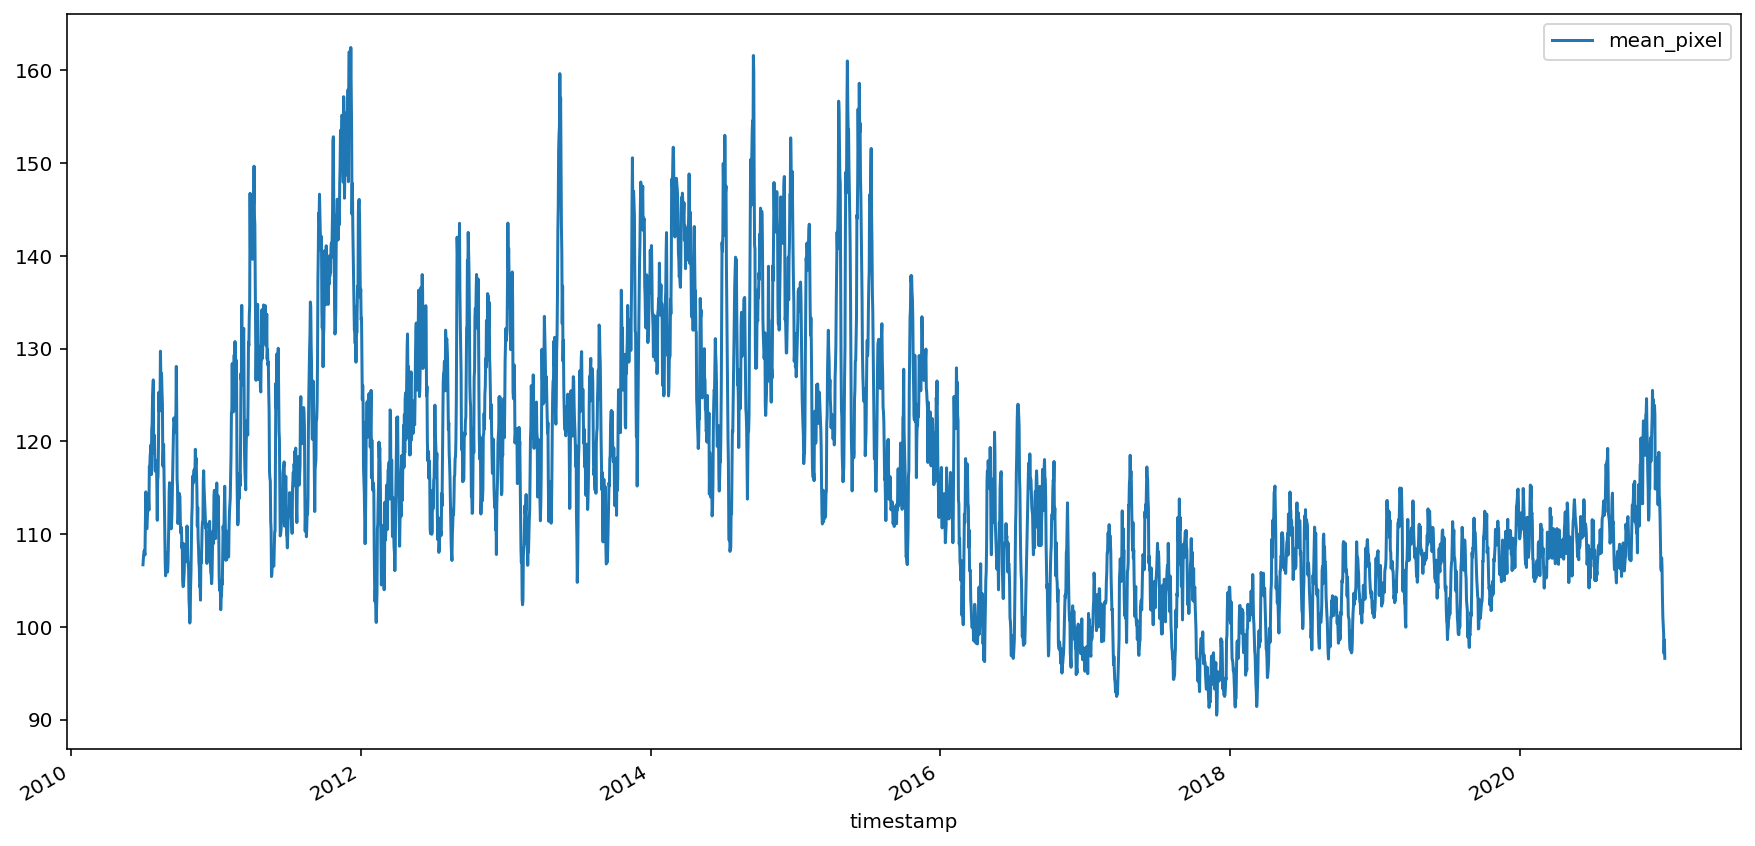

In [13]:
stats_df[["mean_pixel"]].plot(figsize=(15, 7.5))

<AxesSubplot:xlabel='timestamp'>

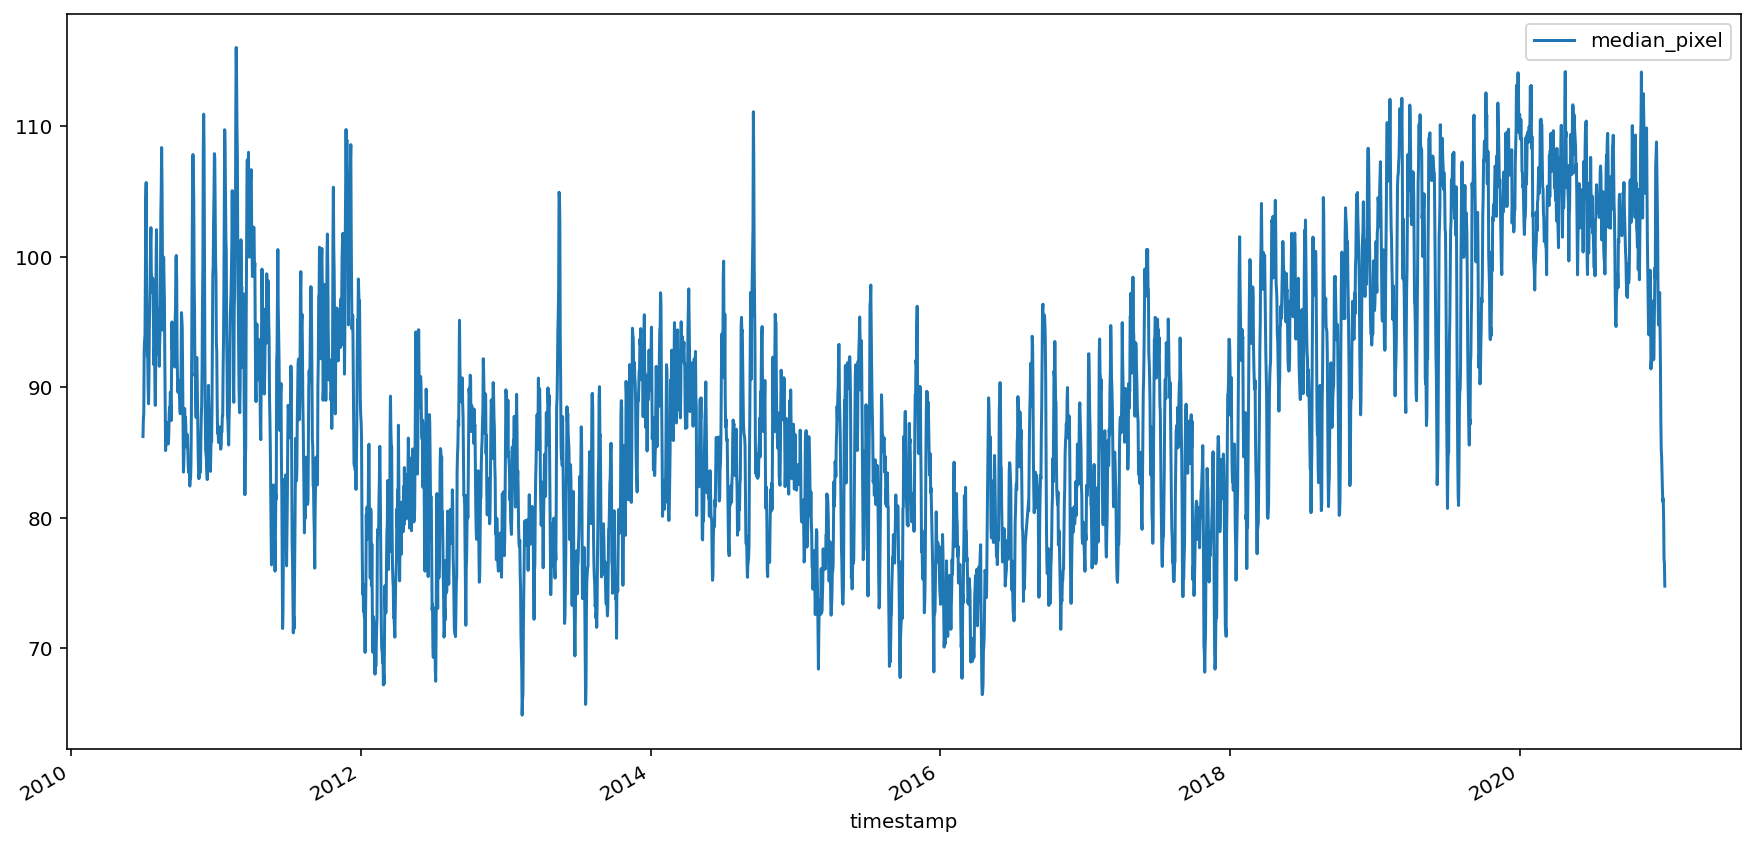

In [14]:
stats_df[["median_pixel"]].plot(figsize=(15, 7.5))

<AxesSubplot:xlabel='timestamp'>

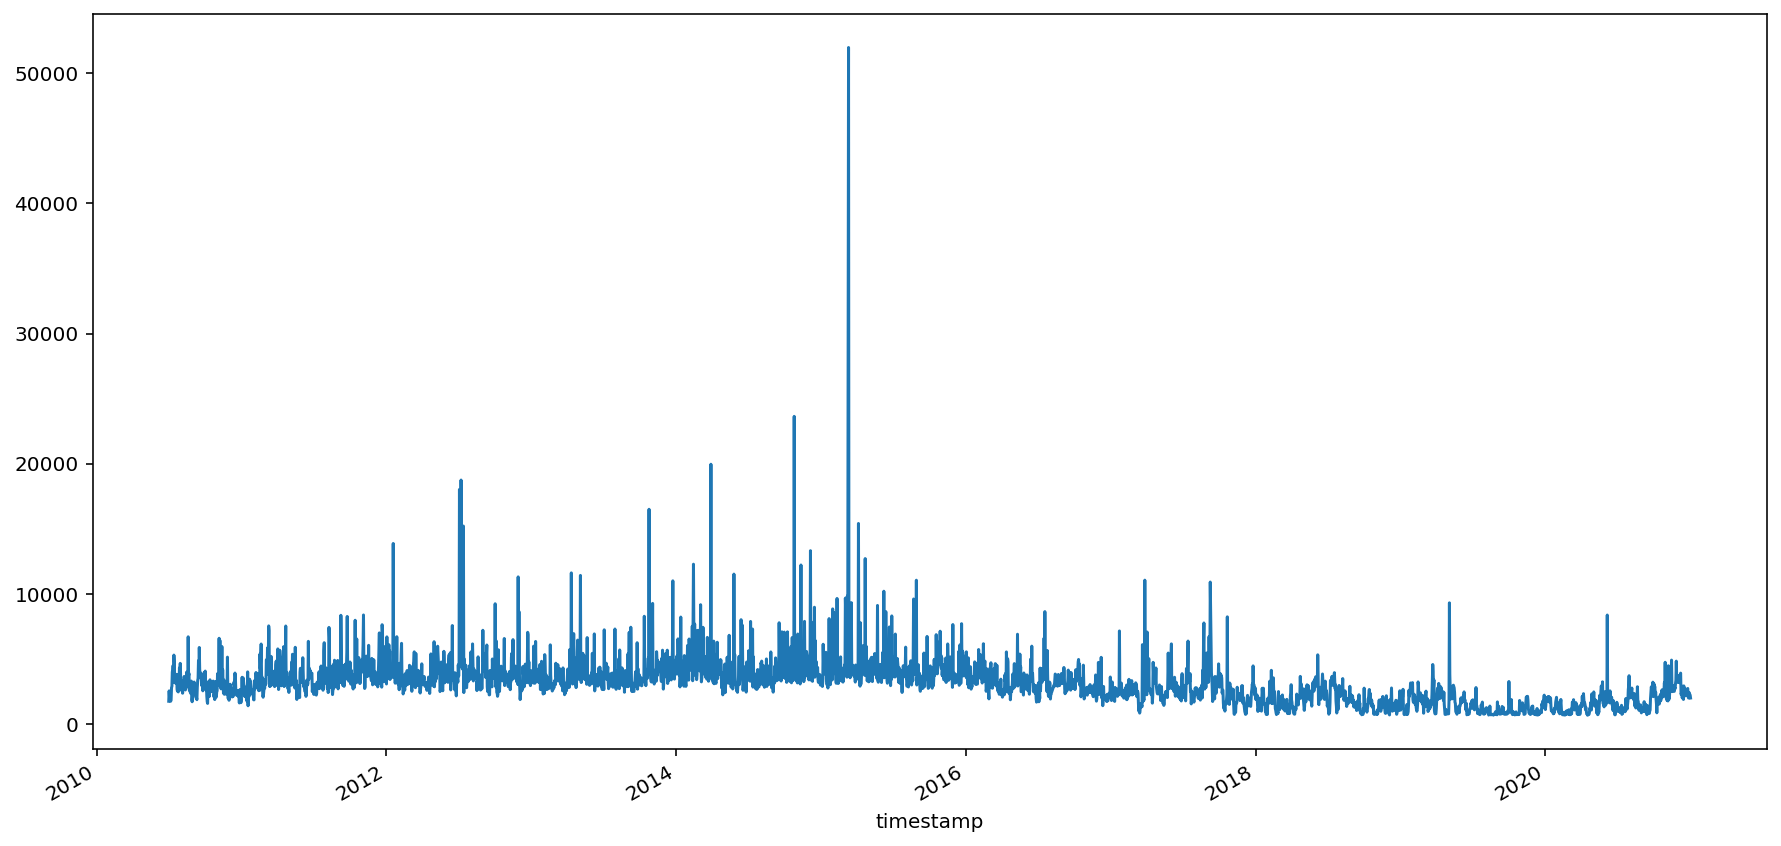

In [15]:
stats_df["max_pixel"].plot(figsize=(15, 7.5))

<AxesSubplot:xlabel='timestamp'>

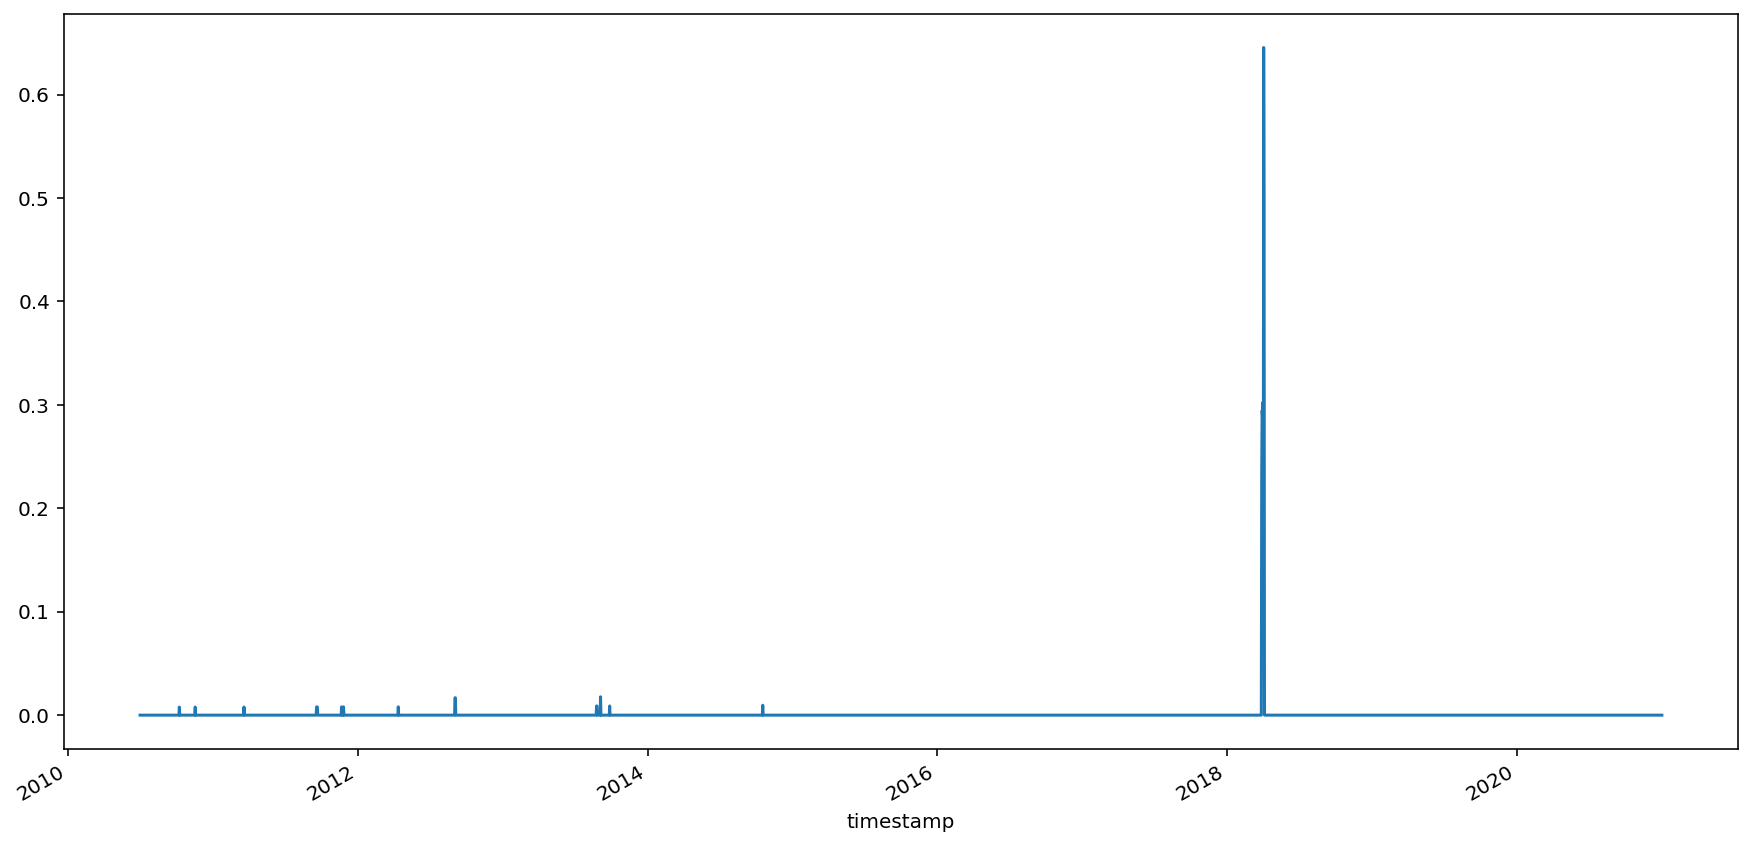

In [16]:
stats_df["min_pixel"].plot(figsize=(15, 7.5))

<AxesSubplot:xlabel='timestamp'>

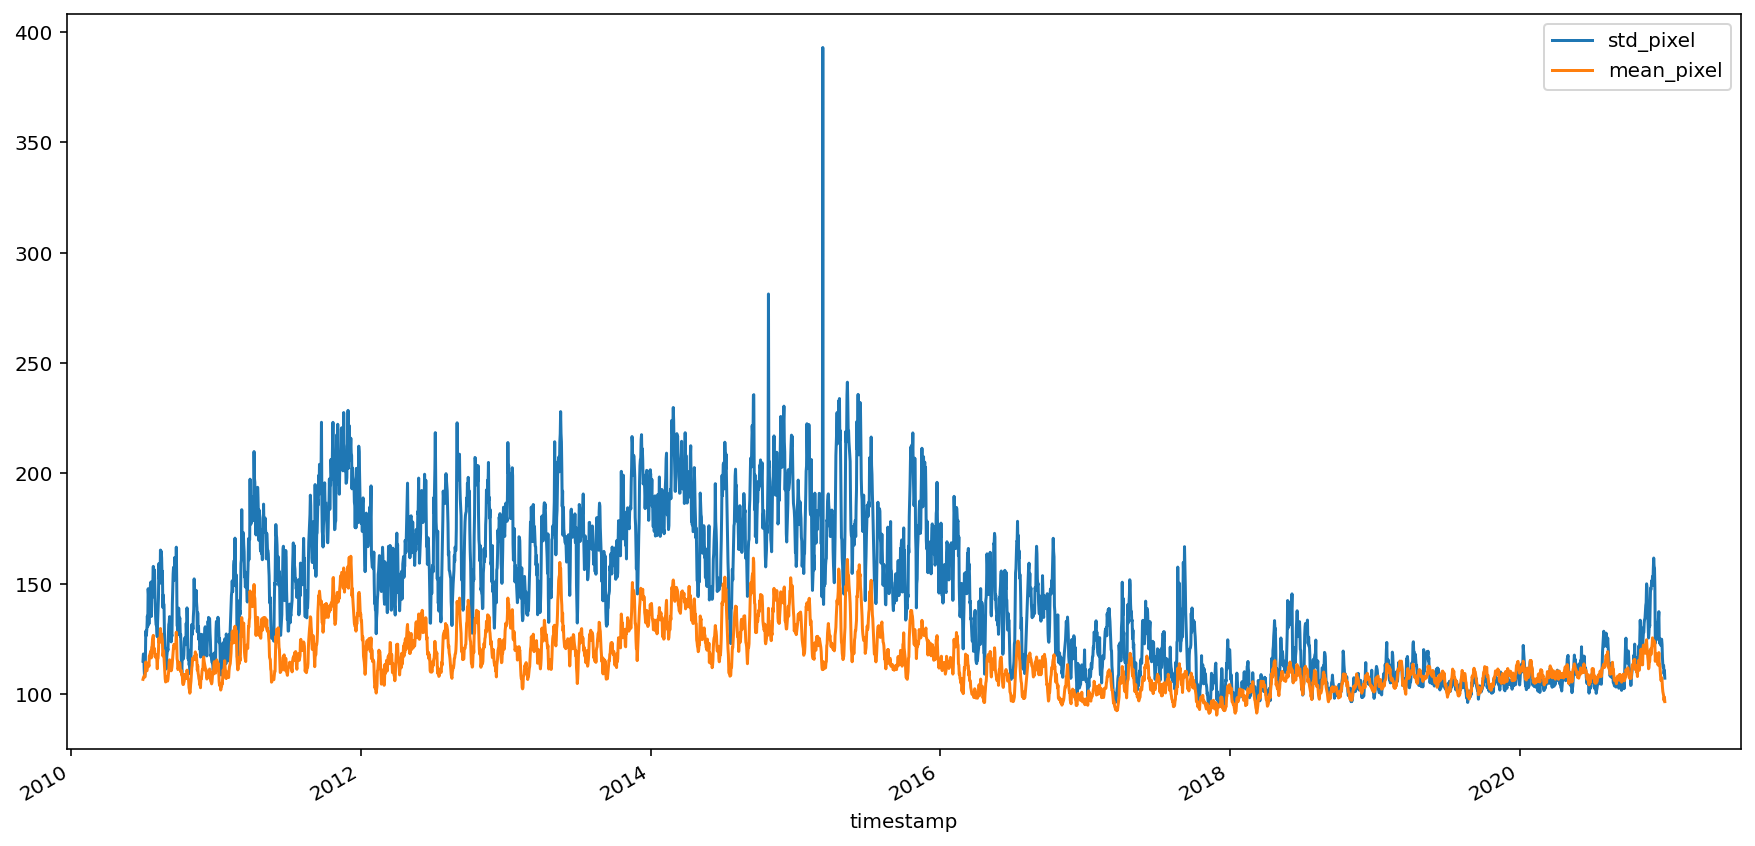

In [17]:
stats_df[["std_pixel", "mean_pixel"]].plot(figsize=(15, 7.5))

In [11]:
stats_df.to_csv("pixel_stats_171A_1d.csv")

In [18]:
import matplotlib.pyplot as plt
import astropy.units as u
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

def plot_goes_and_pixel_intensity(df, pixel_df):
    axes = df.plot(title="GOES X-Ray Flux and Mean Pixel Intensity AIA 171Å", xlabel="Timestamp", ylabel="Watts $m^{-2}$", logy=True, ylim=(1e-9, 1e-2), figsize=(15, 7.5))
    ax2 = axes.twinx()
    ax2.set_yscale("log")
    ax2.set_ylim(1e-9, 1e-2)
    ax2.set_yticklabels([])
    axes.yaxis.grid(True, "major")
    axes.xaxis.grid(False, "major")
    
    ax3 = stats_df[["mean_pixel"]].plot(ax=axes, logy=False, secondary_y=True, color="r")
    ax3.set_ylabel("Mean Pixel Intensity")
    
    h1, l1 = axes.get_legend_handles_labels()
    plt.legend(h1, l1, loc=2)
    
    return axes

In [19]:
stats_df = pd.read_csv("pixel_stats_171A_1d.csv")
stats_df["timestamp"] =  pd.to_datetime(stats_df["timestamp"], utc=True)
stats_df = stats_df.set_index('timestamp', drop=True)
stats_df

,min_pixel,max_pixel,mean_pixel,std_pixel,median_pixel
timestamp,,,,,
2010-07-01 00:00:00.580000+00:00,0.0,1742.293945,106.697563,114.928635,86.232956
2010-07-02 00:00:00.570000+00:00,0.0,2539.478271,107.392647,118.202087,87.592163
2010-07-02 23:54:00.570000+00:00,0.0,2047.888916,107.875473,118.042435,88.040504
2010-07-04 00:00:00.580000+00:00,0.0,2335.114990,108.216385,111.166733,92.744865
2010-07-05 00:00:00.570000+00:00,0.0,1970.041016,108.046623,107.879211,93.548233
...,...,...,...,...,...
2020-12-28 00:00:10.340000+00:00,0.0,2074.511719,100.321007,112.068161,81.469589
2020-12-29 00:00:10.350000+00:00,0.0,2392.094971,99.297729,112.948364,80.028542
2020-12-30 00:00:10.340000+00:00,0.0,2256.593506,97.140320,109.168854,76.881256


In [ ]:
!pip install pyarrow
!python -m pip install "dask[complete]"

In [20]:
ddf = dd.read_parquet("/mnt/nas05/astrodata01/astroml_data/goes/goes_ts.parquet", engine="pyarrow", calculate_divisions=True)
ddf = ddf[(ddf["quality_xrsb"] == 0)]
ddf

,xrsa,xrsb,quality_xrsb,quality_xrsa
npartitions=566,,,,
2010-01-01 00:00:00,float64,float64,int64,int64
2010-01-07 00:00:00,...,...,...,...
...,...,...,...,...
2020-12-24 00:00:00,...,...,...,...
2020-12-30 23:59:59,...,...,...,...


In [21]:
ddf_7d = ddf.loc["2010-07-01 00:00":"2020-12-31 23:59"][["xrsa", "xrsb"]].resample("1d").max().compute()

<AxesSubplot:title={'center':'GOES X-Ray Flux and Mean Pixel Intensity AIA 171Å'}, xlabel='timestamp', ylabel='Watts $m^{-2}$'>

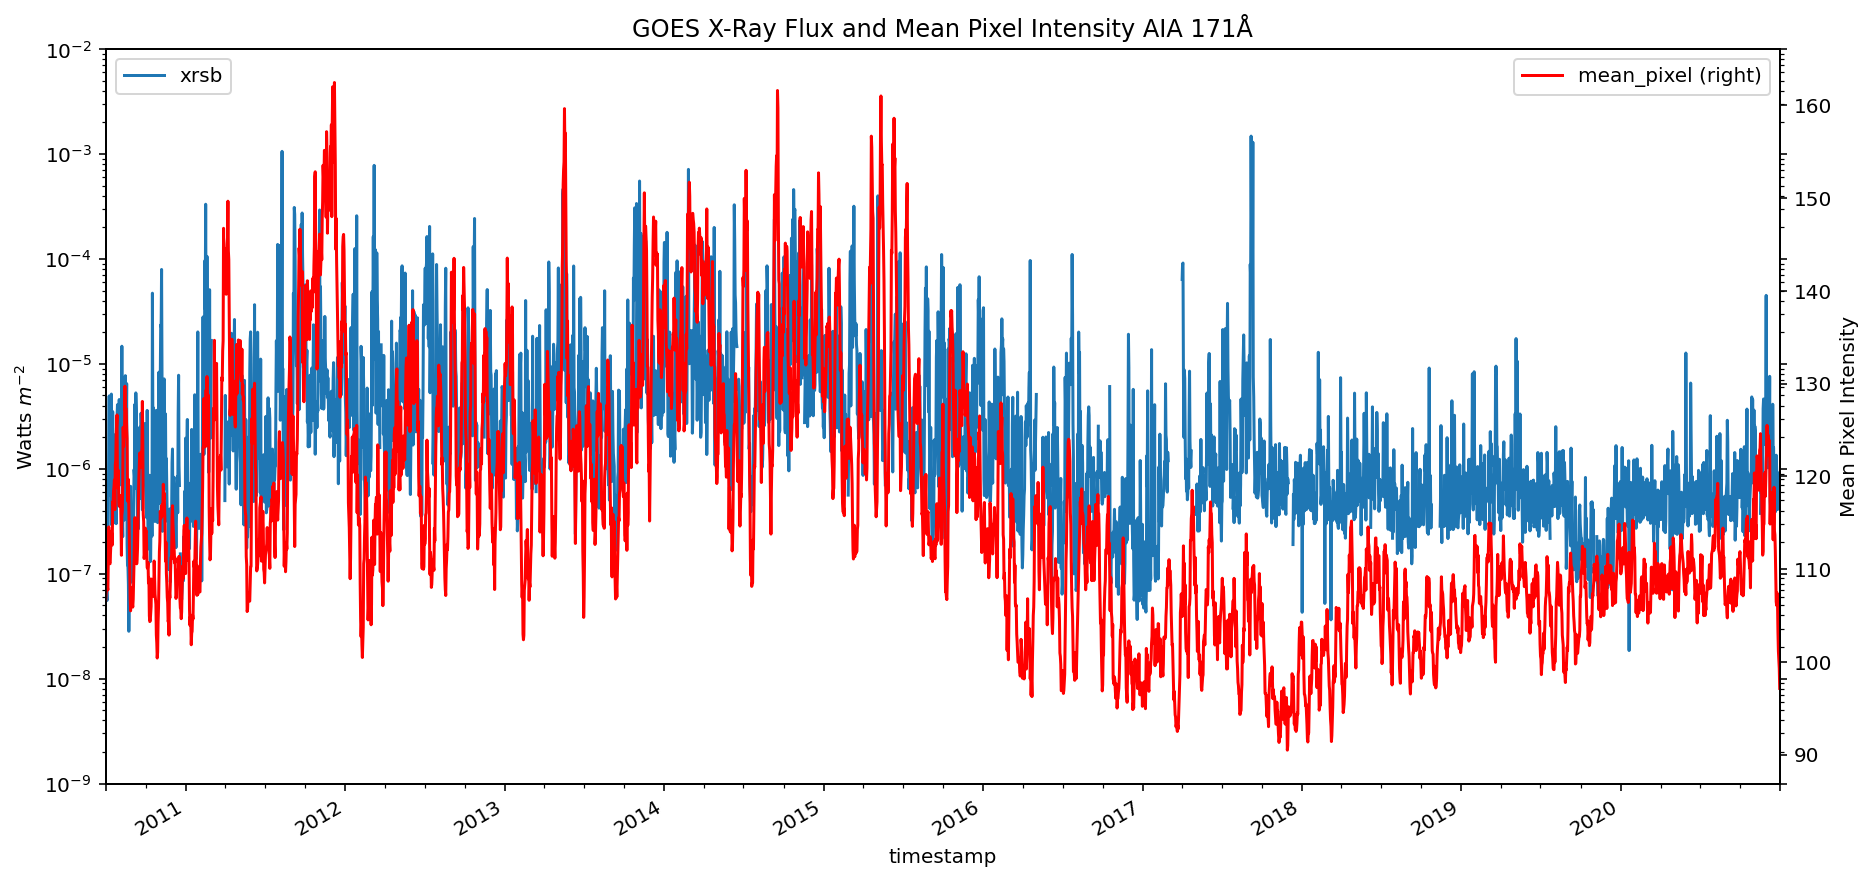

In [22]:
plot_goes_and_pixel_intensity(ddf_7d["xrsb"], stats_df["mean_pixel"])